El objetivo es extraer más información del texto : Objetos directos, relaciones familiares, etc

In [2]:
## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2

## for text
#import wikipediaapi  #0.5.8
#import nltk  #3.8.1
import re   

## for nlp
import spacy  #3.5.0
from spacy import displacy
#import textacy  #0.12.0

## for graph
import networkx as nx  #3.0 (also pygraphviz==1.10)

## for timeline
#import dateparser #1.1.7

In [3]:
nlp = spacy.load("en_core_web_md")

Cambiamos la estrategia para generar el dataframe

In [4]:


txt = """ Peter travels to London.
        Frank likes Berlin.
        Marta goes to Paris.
        Frank visits  Madrid.
        Kepa goes to Bilbao.
        Hellen likes  Berlin.
        Peter goes to Paris.
        John flies to Vienna.
        """
doc = nlp(txt)

lst_docs = [sent for sent in doc.sents]



## extract entities and relations
dic2 = {"id":[], "entity":[], "relation":[], "lugar":[]}

for n,sentence in enumerate(lst_docs):
    temp_dict = {"id": "", "nsubj":"", "ROOT":"", "pobj":"", "dobj":""}
    dic2["id"].append(n)
    for token in sentence: 
        match token.dep_:
            case "nsubj":
                temp_dict["nsub"] = token.text
            case "pobj":
                temp_dict["pobj"]= token.text
            case "ROOT":
                temp_dict["ROOT"]=token.lemma_
            case "dobj":
                temp_dict["dobj"]= token.text
                
    dic2["entity"].append(temp_dict["nsub"])
    dic2["relation"].append(temp_dict["ROOT"])
    dic2["lugar"].append(temp_dict["dobj"]+temp_dict["pobj"])
   
                                        
print(dic2)   
## create dataframe
dtf2 = pd.DataFrame(dic2)

dtf2


{'id': [0, 1, 2, 3, 4, 5, 6, 7], 'entity': ['Peter', 'Frank', 'Marta', 'Frank', 'Kepa', 'Hellen', 'Peter', 'John'], 'relation': ['travel', 'like', 'go', 'visit', 'go', 'like', 'go', 'fly'], 'lugar': ['London', 'Berlin', 'Paris', 'Madrid', 'Bilbao', 'Berlin', 'Paris', 'Vienna']}


,id,entity,relation,lugar
0,0,Peter,travel,London
1,1,Frank,like,Berlin
2,2,Marta,go,Paris
3,3,Frank,visit,Madrid
4,4,Kepa,go,Bilbao
5,5,Hellen,like,Berlin
6,6,Peter,go,Paris
7,7,John,fly,Vienna


['Peter', 'London', 'Frank', 'Berlin', 'Marta', 'Paris', 'Madrid', 'Kepa', 'Bilbao', 'Hellen', 'John', 'Vienna']
[('Peter', 'London'), ('Peter', 'Paris'), ('Frank', 'Berlin'), ('Frank', 'Madrid'), ('Marta', 'Paris'), ('Kepa', 'Bilbao'), ('Hellen', 'Berlin'), ('John', 'Vienna')]
['Peter', 'Peter', 'Frank', 'Frank', 'Marta', 'Kepa', 'Hellen', 'John']


/home/data/Documents/CursoIA/Jupiter/.Jupiter/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


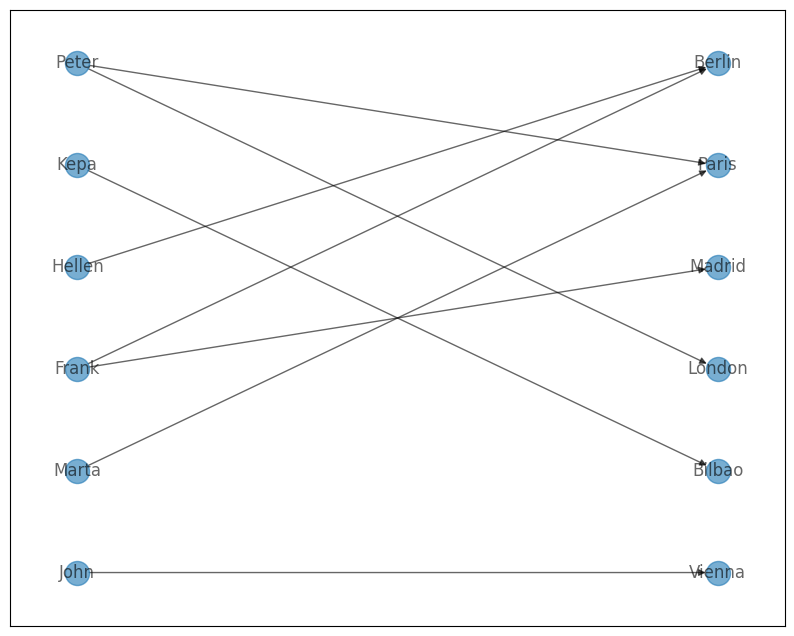

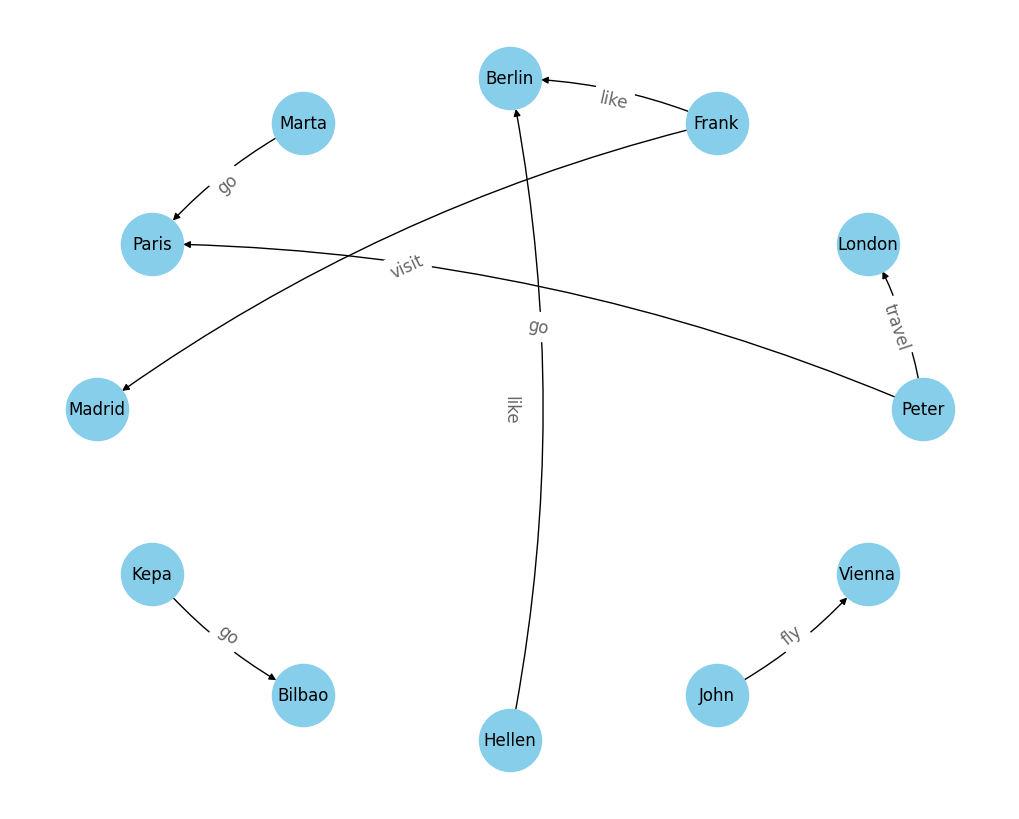

In [5]:
## create full graph
G = nx.from_pandas_edgelist(dtf2, source="entity", target="lugar", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())

# plot como grafo bipartito ( columna:personas  ; columna:ciudades)
print(G.nodes())
print(G.edges())
entity = [ ent for ent,obj in G.edges()]
print (entity)

from networkx.algorithms import bipartite
plt.figure(figsize=(10,8))
nx.draw_networkx(
    G,
    pos = nx.drawing.layout.bipartite_layout(G, entity),
    #label_pos=0.5, 
    #edge_labels=nx.get_edge_attributes(G,'relation'),
    font_size=12,
    font_color='black',
    alpha=0.6
)

## plot como lo hace el tutorial
plt.figure(figsize=(10,8))

pos = nx.circular_layout(G, )
node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                         edge_labels=nx.get_edge_attributes(G,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()


Ahora lo quiero guardar para la siguiente fase

In [6]:
import pickle

# save graph object to file
pickle.dump(G, open('prueba_grafo.pickle', 'wb'))

